# Data Exploration
# First Look

In [82]:
import re
from tabulate import tabulate
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import kstest, mannwhitneyu, zscore

import warnings
warnings.filterwarnings('ignore')


In [83]:
df20 = pd.read_csv('data/adjusted_vacancies_2020.csv')
df20.head()

,premium,name,department_id,department_name,area_id,area_name,has_test,response_letter_required,salary_from,salary_to,...,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
0,False,Team Lead/Senior Data Scientist,NaN,NaN,3,Екатеринбург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,True,False,NaN,NaN,NaN,NaN
1,False,Team Lead/Senior Data Scientist,NaN,NaN,2,Санкт-Петербург,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN
2,False,Team Lead/Senior Data Scientist,NaN,NaN,1,Москва,False,False,NaN,NaN,...,СКБ Контур,fullDay,moreThan6,full,False,False,NaN,NaN,NaN,NaN
3,False,Team Lead/Senior Data Analyst. Аналитик данных,3529-3529-prof,Сбер для экспертов,3,Екатеринбург,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN
4,False,Data scientist (NLP) - Sberbank AI Lab,3529-3529-prof,Сбер для экспертов,1,Москва,False,False,NaN,NaN,...,Сбербанк,fullDay,between1And3,full,False,False,NaN,NaN,NaN,NaN


In [84]:
df24 = pd.read_csv('data/adjusted_vacancies_2024.csv')
df24.head()

,premium,name,has_test,response_letter_required,department_id,department_name,area_id,area_name,salary_from,salary_to,...,employer_name,schedule_id,experience_id,employment_id,is_address,is_insider_interview,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
0,False,Специалист по работе с данными (Excel) / Анали...,False,False,NaN,NaN,1,Москва,170000.0,170000.0,...,ЦУГАМ,fullDay,between1And3,full,True,False,170000.0,170000.0,170000.0,170000.0
1,False,Data Analyst,False,False,NaN,NaN,2,Санкт-Петербург,60000.0,80000.0,...,LoyaltyPlant,flexible,noExperience,full,False,False,60000.0,80000.0,60000.0,80000.0
2,False,"Аналитик по обработке данных (удалённо, проект...",False,False,NaN,NaN,1,Москва,80000.0,80000.0,...,ЛУКОЙЛ,remote,noExperience,full,False,False,80000.0,80000.0,80000.0,80000.0
3,False,Специалист по разметке данных для машинного об...,False,False,NaN,NaN,2,Санкт-Петербург,25000.0,NaN,...,Корда Групп,remote,noExperience,full,True,False,25000.0,NaN,25000.0,NaN
4,False,Младший аналитик данных,False,False,NaN,NaN,1,Москва,NaN,NaN,...,Ростелеком - Центры обработки данных,fullDay,noExperience,full,True,False,NaN,NaN,NaN,NaN


In [85]:
print("2020")
print(df20.info())
print("----------------")
print("2024")
print(df24.info())

2020
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   premium                     897 non-null    bool   
 1   name                        897 non-null    object 
 2   department_id               187 non-null    object 
 3   department_name             187 non-null    object 
 4   area_id                     897 non-null    int64  
 5   area_name                   897 non-null    object 
 6   has_test                    897 non-null    bool   
 7   response_letter_required    897 non-null    bool   
 8   salary_from                 111 non-null    float64
 9   salary_to                   85 non-null     float64
 10  salary_currency             142 non-null    object 
 11  salary_gross                142 non-null    object 
 12  type_id                     897 non-null    object 
 13  employer_name               89

In [86]:
df20.describe()

,area_id,salary_from,salary_to,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
count,897.000000,1.110000e+02,8.500000e+01,1.090000e+02,8.300000e+01,1.110000e+02,8.500000e+01
mean,48.751394,1.627685e+05,2.030953e+05,2.268650e+05,3.114210e+05,1.627685e+05,2.030953e+05
std,274.751283,1.994494e+05,2.671118e+05,2.692134e+05,3.553661e+05,1.994494e+05,2.671118e+05
min,1.000000,2.000000e+03,3.100000e+03,4.040923e+04,4.714411e+04,2.000000e+03,3.100000e+03
25%,1.000000,9.500000e+04,1.000000e+05,1.346974e+05,1.751067e+05,9.500000e+04,1.000000e+05
50%,1.000000,1.500000e+05,1.500000e+05,2.020462e+05,2.289857e+05,1.500000e+05,1.500000e+05
75%,2.000000,2.000000e+05,2.500000e+05,2.693949e+05,4.040923e+05,2.000000e+05,2.500000e+05
max,2734.000000,2.100000e+06,2.400000e+06,2.828646e+06,3.232739e+06,2.100000e+06,2.400000e+06


In [87]:
df24.describe()

,area_id,salary_from,salary_to,salary_from_rub,salary_to_rub,"(False, 'salary_from_rub')","(False, 'salary_to_rub')"
count,2000.000000,359.000000,235.000000,345.000000,220.000000,359.000000,235.000000
mean,53.007500,114053.509749,166561.995745,120436.518186,177573.040909,114053.509749,166561.995745
std,312.262368,88800.223755,126401.269051,89019.226059,123131.607819,88800.223755,126401.269051
min,1.000000,50.000000,1400.000000,50.000000,10000.000000,50.000000,1400.000000
25%,1.000000,60000.000000,76522.500000,60000.000000,80000.000000,60000.000000,76522.500000
50%,1.000000,90000.000000,130000.000000,100000.000000,147500.000000,90000.000000,130000.000000
75%,2.000000,150000.000000,250000.000000,150000.000000,272100.000000,150000.000000,250000.000000
max,6011.000000,700000.000000,600000.000000,700000.000000,600000.000000,700000.000000,600000.000000


In [88]:
# count number of currencies
df = pd.concat([df20['salary_currency'].value_counts(), df24['salary_currency'].value_counts()], axis=1)
df.columns = ['2020', '2024']
df

,2020,2024
RUR,133,405
EUR,6,2
USD,3,17


# Statistical Analysis
## 1. Overall Salary Changes Analysis (2020 vs 2024)

In [89]:
# calculate ratio of non-null values to the total number of rows for all main salary columns
df20_sal_from = df20[['salary_from_rub', 'salary_currency']].dropna()
df24_sal_from = df24[['salary_from_rub', 'salary_currency']].dropna()
df20_sal_to = df20[['salary_to_rub', 'salary_currency']].dropna()
df24_sal_to = df24[['salary_to_rub', 'salary_currency']].dropna()
n20 = len(df20)
n24 = len(df24)

ratios = [
    ("Salary From 2020", len(df20_sal_from), round(len(df20_sal_from) / n20, 3)),
    ("Salary From 2024", len(df24_sal_from), round(len(df24_sal_from) / n24, 3)),
    ("Salary To 2020", len(df20_sal_to), round(len(df20_sal_to) / n20, 3)),
    ("Salary To 2024", len(df24_sal_to), round(len(df24_sal_to) / n24, 3))
]

print(tabulate(ratios, headers=["Column", "Number of non-null values", "Ratio of non-null values"],
               numalign="left", tablefmt="pretty"))


+------------------+---------------------------+--------------------------+
|      Column      | Number of non-null values | Ratio of non-null values |
+------------------+---------------------------+--------------------------+
| Salary From 2020 |            109            |          0.122           |
| Salary From 2024 |            345            |          0.172           |
|  Salary To 2020  |            83             |          0.093           |
|  Salary To 2024  |            220            |           0.11           |
+------------------+---------------------------+--------------------------+


In [90]:
# rename salary_currency to initial_currency
df20_sal_from = df20_sal_from.rename(columns={'salary_currency': 'initial_currency'})
df24_sal_from = df24_sal_from.rename(columns={'salary_currency': 'initial_currency'})
df20_sal_to = df20_sal_to.rename(columns={'salary_currency': 'initial_currency'})
df24_sal_to = df24_sal_to.rename(columns={'salary_currency': 'initial_currency'})

In [91]:
# statistics for salary columns
df = pd.concat([df20_sal_from.describe(), df24_sal_from.describe(), df20_sal_to.describe(), df24_sal_to.describe()],
               axis=1)
df.columns = ['2020 from', '2024 from', '2020 to', '2024 to']
df

,2020 from,2024 from,2020 to,2024 to
count,1.090000e+02,345.000000,8.300000e+01,220.000000
mean,2.268650e+05,120436.518186,3.114210e+05,177573.040909
std,2.692134e+05,89019.226059,3.553661e+05,123131.607819
min,4.040923e+04,50.000000,4.714411e+04,10000.000000
25%,1.346974e+05,60000.000000,1.751067e+05,80000.000000
50%,2.020462e+05,100000.000000,2.289857e+05,147500.000000
75%,2.693949e+05,150000.000000,4.040923e+05,272100.000000
max,2.828646e+06,700000.000000,3.232739e+06,600000.000000


In [92]:
### Visualizations

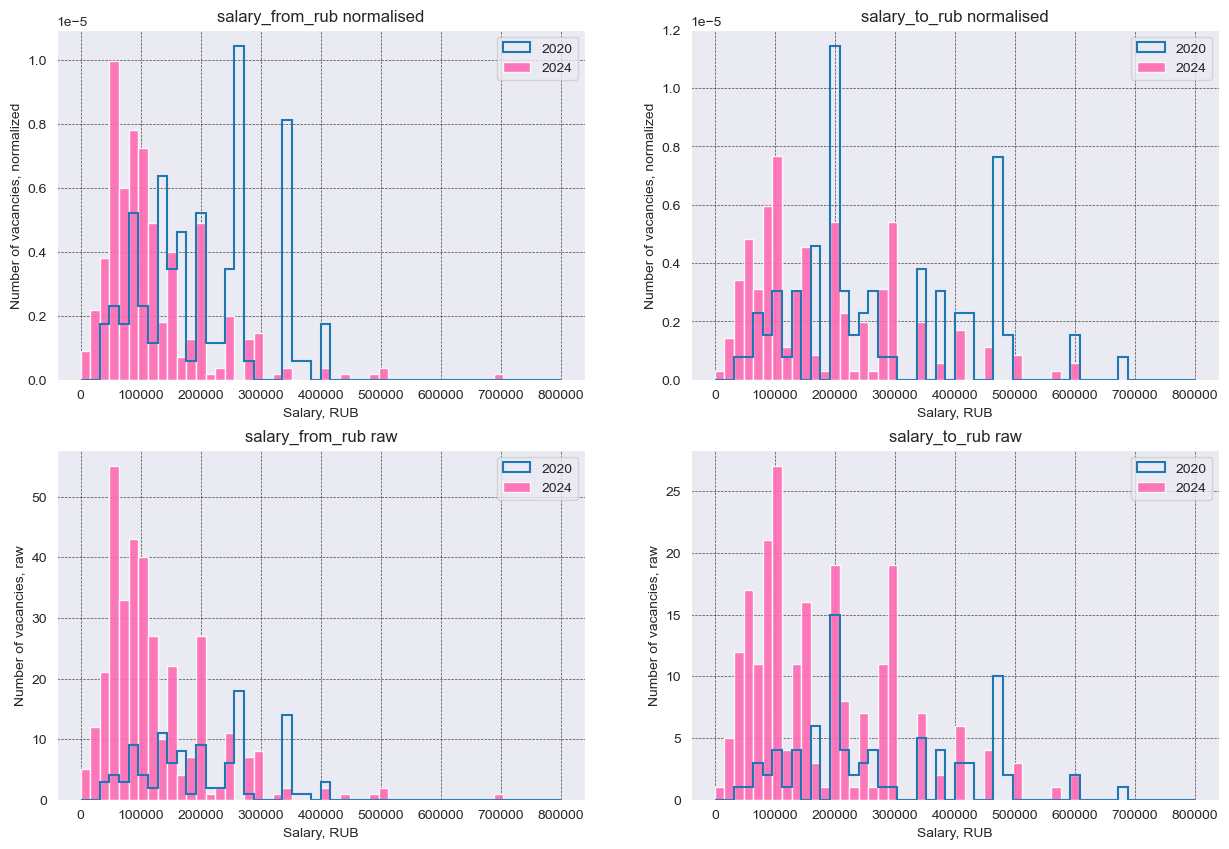

In [93]:
#draw normilized and raw histograms for salary_from and salary_to comparing 2020 and 2024
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

salary_columns = ['salary_from_rub', 'salary_to_rub']

for i, column in enumerate(salary_columns):
    ax[0, i].hist(df20[column], bins=50, range=(0, 800000),
                  density=True,
                  histtype='step', linewidth=1.5)

    ax[0, i].hist(df24[column], bins=50, range=(0, 800000), alpha=0.9, color='hotpink',
                  density=True,
                  histtype='bar')

    ax[0, i].set_title(f'{column} normalised')
    ax[0, i].legend(['2020', '2024'])
    ax[0, i].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
    ax[0, i].set_ylabel('Number of vacancies, normalized')
    ax[0, i].set_xlabel('Salary, RUB')

    ax[1, i].hist(df20[column], bins=50, range=(0, 800000),
                  histtype='step', linewidth=1.5)

    ax[1, i].hist(df24[column], bins=50, range=(0, 800000), alpha=0.9, color='hotpink',
                  histtype='bar')

    ax[1, i].set_title(f'{column} raw')
    ax[1, i].legend(['2020', '2024'])
    ax[1, i].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
    ax[1, i].set_ylabel('Number of vacancies, raw')
    ax[1, i].set_xlabel('Salary, RUB')

plt.show()

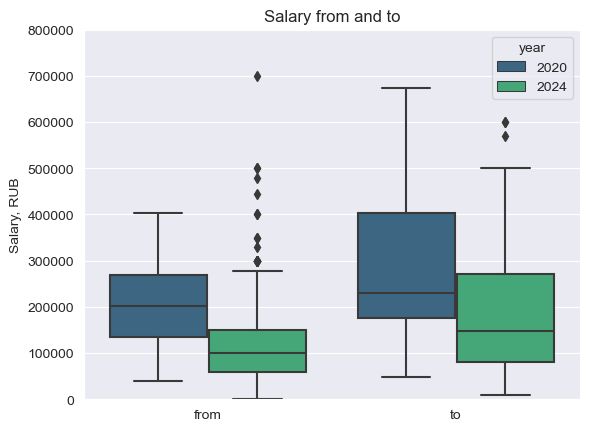

In [94]:
# boxplots for salary_from and salary_to
combined_2020 = pd.concat([df20_sal_from.assign(flag='from'), df20_sal_to.assign(flag='to')])
combined_2024 = pd.concat([df24_sal_from.assign(flag='from'), df24_sal_to.assign(flag='to')])
# combine with year=2020 and year=2024
combined_2020['year'] = 2020
combined_2024['year'] = 2024
combined = pd.concat([combined_2020, combined_2024])
# make salary_from and salary_to as one column based on flag, if flag=from, then salary = salary_from, if flag=to, then salary=salary_to
combined['salary'] = combined.apply(lambda x: x['salary_from_rub'] if x['flag'] == 'from' else x['salary_to_rub'],
                                    axis=1)

# make one plot with two paired boxplots
ax = sns.boxplot(x='flag', y='salary', data=combined, palette='viridis', hue='year')
ax.set_title('Salary from and to')
ax.set_ylabel('Salary, RUB')
ax.set_xlabel('')
ax.set_ylim(0, 800000)
plt.show()

### Goodness of Fit Test (Kolmogorov-Smirnov Test for Normality)

In [95]:
# # check for normality with ks test


# df20_sal_from, df24_sal_from, df20_sal_to, df24_sal_to are needed

# Create a list of DataFrames
dataframes = [df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub'],
              df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub']]

# Create a list of labels for the results table
labels = ["Salary from 20", "Salary from 24", "Salary to 20", "Salary to 24"]

# Create an empty DataFrame to store the results
results_table = pd.DataFrame(columns=['Test', 'KS Statistic', 'P-Value'])

# Loop through dataframes and labels
for df, label in zip(dataframes, labels):
    z_score = zscore(df)
    test_result = kstest(z_score, 'norm')
    p_value = round(test_result[1], 4)

    # Append results to the table
    results_table = pd.concat(
        [results_table, pd.DataFrame({'Test': [label], 'KS Statistic': [test_result[0]], 'P-Value': [p_value]})],
        ignore_index=True)

# Display the results table
print(results_table)



             Test  KS Statistic  P-Value
0  Salary from 20      0.267606   0.0000
1  Salary from 24      0.185121   0.0000
2    Salary to 20      0.259568   0.0000
3    Salary to 24      0.152430   0.0001


**Since the p-values are much less than 0.05, we can reject the null hypothesis and conclude that the distributions are not normal. Because of this, we will use non-parametric tests for further analysis.**

### Hypothesis Testing (Non-parametric Tests: Kolmogorov-Smirnov and Mann-Whitney U Test)

Perform a statistical test to determine if the salary distributions of two datasets are the same. For this purpose, we will use the Kolmogorov-Smirnov test, where the null hypothesis is that the two distributions are the same. Let us define the significance level as 0.05, so if the p-value is less than 0.05, we will reject the null hypothesis and conclude that the two distributions are different.
As we can see, the p-values for both salary_from and salary_to are much less than 0.05, so we can reject the null hypothesis and conclude that the two distributions are different.

Now, let us perform a Mann-Whitney U test, which is a non-parametric test of the null hypothesis that two distributions are the same against an alternative hypothesis. Mann-Whitney U test not only checks if the two distributions are different, but also checks if one distribution is shifted to the right or to the left in comparison with the other distribution.
Of course, it will be better to use Wilcoxon signed-rank test or Krukal-Wallis test to check the difference in medians, but the data is not ordinally scaled, so we cannot use Wilcoxon signed-rank test, and there is only 2 groups, so to use Mann-Whitney U test is preferable over Krukal-Wallis test.

Additionally, we will use the one-tailed test, because we are interested in the direction of the shift and we saw in plots that the salaries in 2024 are shifted to the left in comparison with the salaries in 2020. So we are going to provide one-tailed Mann-Whitney U test with:
 H0: the salaries in 2024 are the same or greater than the salaries in 2020;
 H1: the salaries in 2024 are less than the salaries in 2020.


In [96]:
tests = [
    ("Kolmogorov-Smirnov From", df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub']),
    ("Kolmogorov-Smirnov To", df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub']),
    ("Mann-Whitney U From", df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub']),
    ("Mann-Whitney U To", df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub']),
    ("Mann-Whitney U From One-Sided", df20_sal_from['salary_from_rub'], df24_sal_from['salary_from_rub']),
    ("Mann-Whitney U To One-Sided", df20_sal_to['salary_to_rub'], df24_sal_to['salary_to_rub']),
]

results = []

for test_type, data1, data2 in tests:
    if test_type == "Kolmogorov-Smirnov From" or test_type == "Kolmogorov-Smirnov To":
        test_result = kstest(data1, data2)
    elif test_type == "Mann-Whitney U From" or test_type == "Mann-Whitney U To":
        test_result = mannwhitneyu(data1, data2)
    elif test_type == "Mann-Whitney U From One-Sided" or test_type == "Mann-Whitney U To One-Sided":
        test_result = mannwhitneyu(data2, data1, alternative='less')

    p_value = test_result.pvalue
    stat = test_result.statistic

    results.append([test_type, p_value, stat])

# Create a summary table
summary_table = []

for result in results:
    test_type, p_value, stat = result
    result_str = "same" if p_value > 0.05 else "different"
    summary_table.append([test_type, p_value, stat, result_str])

# Display the summary table
print("Summary of Statistical Tests")
print(tabulate(summary_table, headers=["Test", "p_value", "Stat", "Result"], numalign="left", tablefmt="pretty"))


Summary of Statistical Tests
+-------------------------------+------------------------+---------------------+-----------+
|             Test              |        p_value         |        Stat         |  Result   |
+-------------------------------+------------------------+---------------------+-----------+
|    Kolmogorov-Smirnov From    | 9.828036940456279e-18  | 0.47788857864645656 | different |
|     Kolmogorov-Smirnov To     | 2.6584314675455293e-09 | 0.40312157721796277 | different |
|      Mann-Whitney U From      | 7.489543387710043e-17  |       28753.0       | different |
|       Mann-Whitney U To       | 1.0828926210489992e-08 |       13017.0       | different |
| Mann-Whitney U From One-Sided | 3.7447716938550217e-17 |       8852.0        | different |
|  Mann-Whitney U To One-Sided  | 5.414463105244996e-09  |       5243.0        | different |
+-------------------------------+------------------------+---------------------+-----------+


**Since the p-values are much less than 0.05, we can reject the null hypotheses and conclude that the salaries in 2024 are different from the salaries in 2020 according to both Kolmogorov-Smirnov and Mann-Whitney U tests.**

**Additionally, we can conclude that the salaries in 2024 are less than the salaries in 2020 according to one-tailed Mann-Whitney U tests.**

## 2. Compare salaries of specialists with different experience levels (2020 vs 2024)

### Visualizations

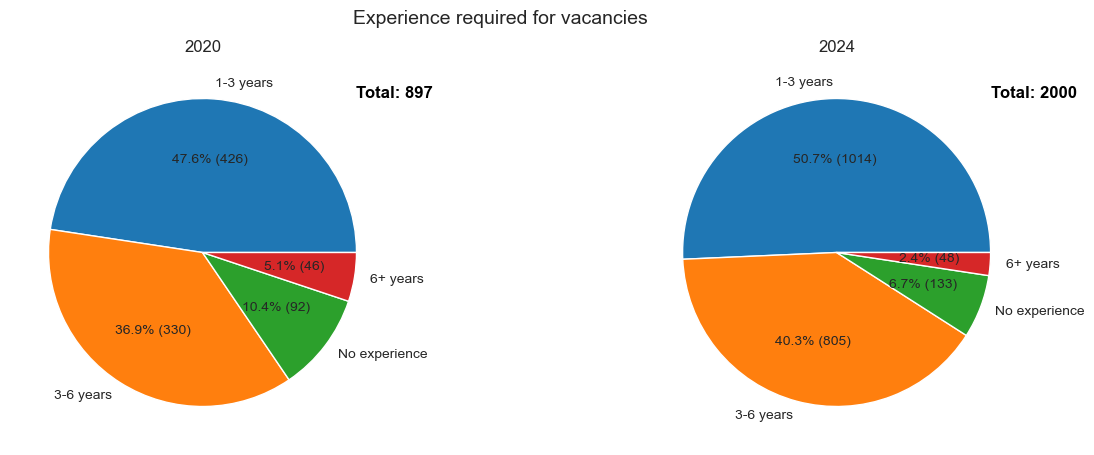

In [97]:
# draw a pie chart with percentages for 2020 and 2024 without Total row

total20 = df20['experience_id'].value_counts().sum()
total24 = df24['experience_id'].value_counts().sum()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# rename noExperience to No experience, 1-3 to 1-3 years, 3-6 to 3-6 years and 6+ to 6+ years
df20_ = df20.copy()
df24_ = df24.copy()
df20_['experience_id'] = df20['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})
df24_['experience_id'] = df24['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})

# reindex the series {No experience: 0, 1-3 years: 1, 3-6 years: 2, 6+ years: 3}
df20_['experience_id'] = df20_['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)


def func(pct, allvals):
    absolute = int(pct / 100. * np.sum(allvals))
    return f"{pct:.1f}% ({absolute})"


ax[0].pie(df20_['experience_id'].value_counts(), labels=df20_['experience_id'].value_counts().index,
          autopct=lambda pct: func(pct, df20_['experience_id'].value_counts()))

ax[1].pie(df24_['experience_id'].value_counts(), labels=df24_['experience_id'].value_counts().index,
          autopct=lambda pct: func(pct, df24_['experience_id'].value_counts()))

# add a total number of vacancies
ax[0].text(1, 1, f"Total: {total20}", fontsize=12, color='black', weight='bold')
ax[1].text(1, 1, f"Total: {total24}", fontsize=12, color='black', weight='bold')

# put a title
ax[0].set_title('2020')
ax[1].set_title('2024')

# add a title of the whole plot
fig.suptitle('Experience required for vacancies', fontsize=14)
plt.show()

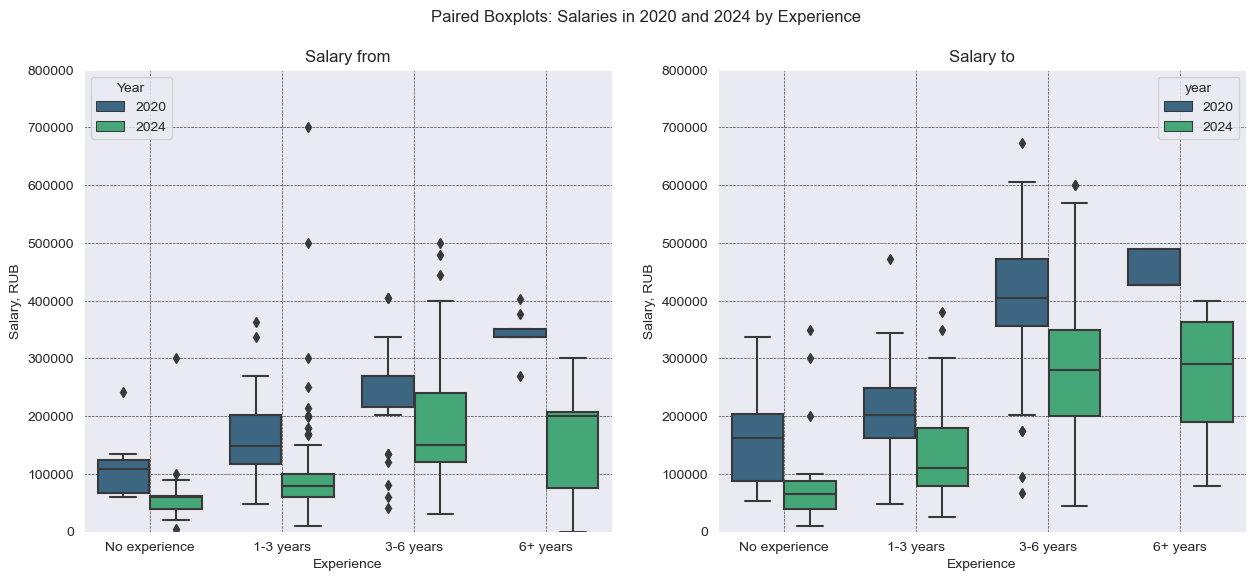

In [98]:
# Combine 'from' and 'to' data for 2020 and 2024
df_combined_2020 = pd.concat([df20_[['experience_id', 'salary_from_rub']].assign(year='2020'),
                              df20_[['experience_id', 'salary_to_rub']].assign(year='2020')])
df_combined_2024 = pd.concat([df24_[['experience_id', 'salary_from_rub']].assign(year='2024'),
                              df24_[['experience_id', 'salary_to_rub']].assign(year='2024')])

# Order the experience_id indexes
df_combined_2020['experience_id'] = df_combined_2020['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)
df_combined_2024['experience_id'] = df_combined_2024['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)

# Rename 'No experience' to 'No experience', '1-3' to '1-3 years', '3-6' to '3-6 years', '6+' to '6+ years'
df_combined_2020['experience_id'] = df_combined_2020['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})
df_combined_2024['experience_id'] = df_combined_2024['experience_id'].replace(
    {'noExperience': 'No experience', 'between1And3': '1-3 years', 'between3And6': '3-6 years',
     'moreThan6': '6+ years'})

# Create paired boxplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Make 2 boxplots appear on the same scale
ax[0] = sns.boxplot(x='experience_id', y='salary_from_rub', hue='year',
                    data=pd.concat([df_combined_2020, df_combined_2024]), ax=ax[0], palette='viridis')
ax[1] = sns.boxplot(x='experience_id', y='salary_to_rub', hue='year',
                    data=pd.concat([df_combined_2020, df_combined_2024]), ax=ax[1], palette='viridis')
ax[0].set_title('Salary from')
ax[1].set_title('Salary to')
ax[0].set_ylim(0, 800000)
ax[1].set_ylim(0, 800000)

# Add a title for the entire plot
fig.suptitle('Paired Boxplots: Salaries in 2020 and 2024 by Experience')

# Add a legend
ax[0].legend(title='Year', loc='upper left')

# Add grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[0].set_ylabel('Salary, RUB')
ax[0].set_xlabel('Experience')
ax[1].set_ylabel('Salary, RUB')
ax[1].set_xlabel('Experience')

plt.show()


In [99]:
df20_['year'] = 2020
df24_['year'] = 2024
df = pd.concat([df20_, df24_], axis=0)

df['experience_id'] = df['experience_id'].astype('category').cat.reorder_categories(
    ['No experience', '1-3 years', '3-6 years', '6+ years'], ordered=True)

df.groupby(['year', 'experience_id'])['salary_from_rub'].describe()

count           mean            std            min  \
year experience_id                                                       
2020 No experience   11.0  108860.028823   51930.428371   60613.851819   
     1-3 years       50.0  159293.202581   67215.990679   47144.106970   
     3-6 years       37.0  318796.096324  432257.809093   40409.234546   
     6+ years        11.0  342791.301179   32488.171028  269394.896974   
2024 No experience   52.0   58246.057692   39892.489395      50.000000   
     1-3 years      176.0   96897.945846   71403.683775   10000.000000   
     3-6 years      105.0  185828.717191   92248.609221   30000.000000   
     6+ years        12.0  162979.166667   94502.553353      90.000000   

                              25%            50%            75%           max  
year experience_id                                                             
2020 No experience   67348.724243  107757.958790  124595.139850  2.424554e+05  
     1-3 years      117523.523805  148167.193336  202046.172730  3.636831e+05  
     3-6 years      215515.917579  269394.896974  269394.896974  2.828646e+06  
     6+ years       336743.621217  336743.621217  350213.366066  4.032681e+05  
2024 No experience   40000.000000   60000.000000   61250.000000  3.000000e+05  
     1-3 years       60000.000000   80000.000000  100000.000000  7.000000e+05  
     3-6 years      120000.000000  150000.000000  240000.000000  5.000000e+05  
     6+ years        75915.000000  200000.000000  207500.000000  3.000000e+05

### Hypothesis Testing on experience level groups (2020 vs. 2024) with Mann-Whitney U Test and Kolmogorov-Smirnov Test

The same as for the overall salary changes analysis, we will use the Kolmogorov-Smirnov test and Mann-Whitney U test to compare the salaries in 2020 and 2024 for different experience levels, because the conditions are the same.
H0: the salaries in 2020 are the same as the salaries in 2024;
H1: the salaries in 2020 are different from the salaries in 2024.

In [115]:
# statistical hypothesis testing for different levels of experience
result_table_mann_from = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_kstest_from = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_mann_to = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_kstest_to = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_mann_from_one_tailed = pd.DataFrame(columns=['Experience Level', 'p-value'])
result_table_mann_to_one_tailed = pd.DataFrame(columns=['Experience Level', 'p-value'])

# Loop through experience levels and perform both tests
for experience_level in df_combined_2020['experience_id'].unique():
    data_2020_from = df_combined_2020[df_combined_2020['experience_id'] == experience_level]['salary_from_rub']
    data_2024_from = df_combined_2024[df_combined_2024['experience_id'] == experience_level]['salary_from_rub']

    # drop NaNs
    data_2020 = data_2020_from.dropna()
    data_2024 = data_2024_from.dropna()
    stat = mannwhitneyu(data_2020, data_2024)
    stat_kstest = kstest(data_2020, data_2024)
    stat_one_tailed = mannwhitneyu(data_2024, data_2020, alternative='less')

    result_table_mann_from = pd.concat([result_table_mann_from,
                                        pd.DataFrame(
                                            {'Experience Level': [experience_level], 'p-value': [round(stat.pvalue, 4)],
                                             'stat': [stat.statistic],
                                             "Result": ["same" if stat.pvalue > 0.05 else "different"]})],
                                       ignore_index=True)
    result_table_kstest_from = pd.concat([result_table_kstest_from,
                                          pd.DataFrame({'Experience Level': [experience_level],
                                                        'p-value': [round(stat_kstest.pvalue, 4)],
                                                        'stat': [stat_kstest.statistic], "Result": [
                                                  "same" if stat_kstest.pvalue > 0.05 else "different"]})],
                                         ignore_index=True)
    result_table_mann_from_one_tailed = pd.concat([result_table_mann_from_one_tailed,
                                                  pd.DataFrame(
                                                      {'Experience Level': [experience_level], 'p-value': [round(stat_one_tailed.pvalue, 4)],
                                                       'stat': [stat_one_tailed.statistic],
                                                       "Result": ["same" if stat_one_tailed.pvalue > 0.05 else "different"]})],
                                                 ignore_index=True)

    data_2020_to = df_combined_2020[df_combined_2020['experience_id'] == experience_level]['salary_to_rub']
    data_2024_to = df_combined_2024[df_combined_2024['experience_id'] == experience_level]['salary_to_rub']

    # drop NaNs
    data_2020 = data_2020_to.dropna()
    data_2024 = data_2024_to.dropna()
    stat = mannwhitneyu(data_2020, data_2024)
    stat_kstest = kstest(data_2020, data_2024)
    stat_one_tailed = mannwhitneyu(data_2024, data_2020, alternative='less')

    result_table_mann_to = pd.concat([result_table_mann_to,
                                      pd.DataFrame(
                                          {'Experience Level': [experience_level], 'p-value': [round(stat.pvalue, 4)],
                                           'stat': [stat.statistic],
                                           "Result": ["same" if stat.pvalue > 0.05 else "different"]})],
                                     ignore_index=True)
    result_table_kstest_to = pd.concat([result_table_kstest_to,
                                        pd.DataFrame({'Experience Level': [experience_level],
                                                      'p-value': [round(stat_kstest.pvalue, 4)],
                                                      'stat': [stat_kstest.statistic], "Result": [
                                                "same" if stat_kstest.pvalue > 0.05 else "different"]})],
                                       ignore_index=True)
    result_table_mann_to_one_tailed = pd.concat([result_table_mann_to_one_tailed,
                                                pd.DataFrame(
                                                    {'Experience Level': [experience_level], 'p-value': [round(stat_one_tailed.pvalue, 4)],
                                                     'stat': [stat_one_tailed.statistic],
                                                     "Result": ["same" if stat_one_tailed.pvalue > 0.05 else "different"]})],
                                               ignore_index=True)


def print_experiments(data, exp):
    if exp is 'mann_to':
        print("Mann-Whitney U Test Results, To:")
        print(tabulate(data, headers="keys", tablefmt="pretty"))
    if exp is 'kstest_to':
        print("Kolmogorov-Smirnov Test Results, To:")
        print(tabulate(data, headers="keys", tablefmt="pretty"))
    if exp is 'mann_from':
        print("Mann-Whitney U Test Results, From:")
        print(tabulate(data, headers="keys", tablefmt="pretty"))
    if exp is 'kstest_from':
        print("Kolmogorov-Smirnov Test Results, From:")
        print(tabulate(data, headers="keys", tablefmt="pretty"))
    if exp is 'one-tailed-mann_from':
        print("One-tailed Mann-Whitney U Test Results, From:")
        print(tabulate(data, headers="keys", tablefmt="pretty"))
    if exp is 'one-tailed-mann_to':
        print("One-tailed Mann-Whitney U Test Results, To:")
        print(tabulate(data, headers="keys", tablefmt="pretty"))

print_experiments(result_table_mann_from, exp='mann_from')
print_experiments(result_table_kstest_from, exp='kstest_from')
print_experiments(result_table_mann_to, exp='mann_to')
print_experiments(result_table_kstest_to, exp='kstest_to')

Mann-Whitney U Test Results, From:
+---+------------------+---------+--------+-----------+
|   | Experience Level | p-value |  stat  |  Result   |
+---+------------------+---------+--------+-----------+
| 0 |     6+ years     | 0.0001  | 131.0  | different |
| 1 |    1-3 years     |   0.0   | 7052.0 | different |
| 2 |    3-6 years     |   0.0   | 2842.0 | different |
| 3 |  No experience   |   0.0   | 515.0  | different |
+---+------------------+---------+--------+-----------+
Kolmogorov-Smirnov Test Results, From:
+---+------------------+---------+--------------------+-----------+
|   | Experience Level | p-value |        stat        |  Result   |
+---+------------------+---------+--------------------+-----------+
| 0 |     6+ years     |   0.0   | 0.9166666666666666 | different |
| 1 |    1-3 years     |   0.0   | 0.5809090909090909 | different |
| 2 |    3-6 years     |   0.0   | 0.5521235521235521 | different |
| 3 |  No experience   |   0.0   |        0.75        | different |
+-

As we can see, the p-values are much less than 0.05, so we can reject the null hypothesis and conclude that the salaries in 2020 are different from the salaries in 2024 for all experience levels according to both Kolmogorov-Smirnov and Mann-Whitney U tests.

Let us print results of one-tailed Mann-Whitney U tests for each experience level with:
 H0: the salaries in 2024 are the same or greater than the salaries in 2020;
 H1: the salaries in 2024 are less than the salaries in 2020.

In [116]:
print("One-tailed Mann-Whitney U Test Results, From:")
print(tabulate(result_table_mann_from_one_tailed, headers="keys", tablefmt="pretty"))
print("One-tailed Mann-Whitney U Test Results, To:")
print(tabulate(result_table_mann_to_one_tailed, headers="keys", tablefmt="pretty"))

One-tailed Mann-Whitney U Test Results, From:
+---+------------------+---------+--------+-----------+
|   | Experience Level | p-value |  stat  |  Result   |
+---+------------------+---------+--------+-----------+
| 0 |     6+ years     |   0.0   |  1.0   | different |
| 1 |    1-3 years     |   0.0   | 1748.0 | different |
| 2 |    3-6 years     |   0.0   | 1043.0 | different |
| 3 |  No experience   |   0.0   |  57.0  | different |
+---+------------------+---------+--------+-----------+
One-tailed Mann-Whitney U Test Results, To:
+---+------------------+---------+--------+-----------+
|   | Experience Level | p-value |  stat  |  Result   |
+---+------------------+---------+--------+-----------+
| 0 |     6+ years     | 0.0009  |  0.0   | different |
| 1 |    1-3 years     |   0.0   | 1180.0 | different |
| 2 |    3-6 years     | 0.0007  | 453.0  | different |
| 3 |  No experience   | 0.0058  |  53.0  | different |
+---+------------------+---------+--------+-----------+


**So, we can conclude that the salaries in 2024 are less than the salaries in 2020 for all experience levels according to one-tailed Mann-Whitney U tests.**

## 3. Compare salaries in different areas (cities in this case) (2020 vs 2024)

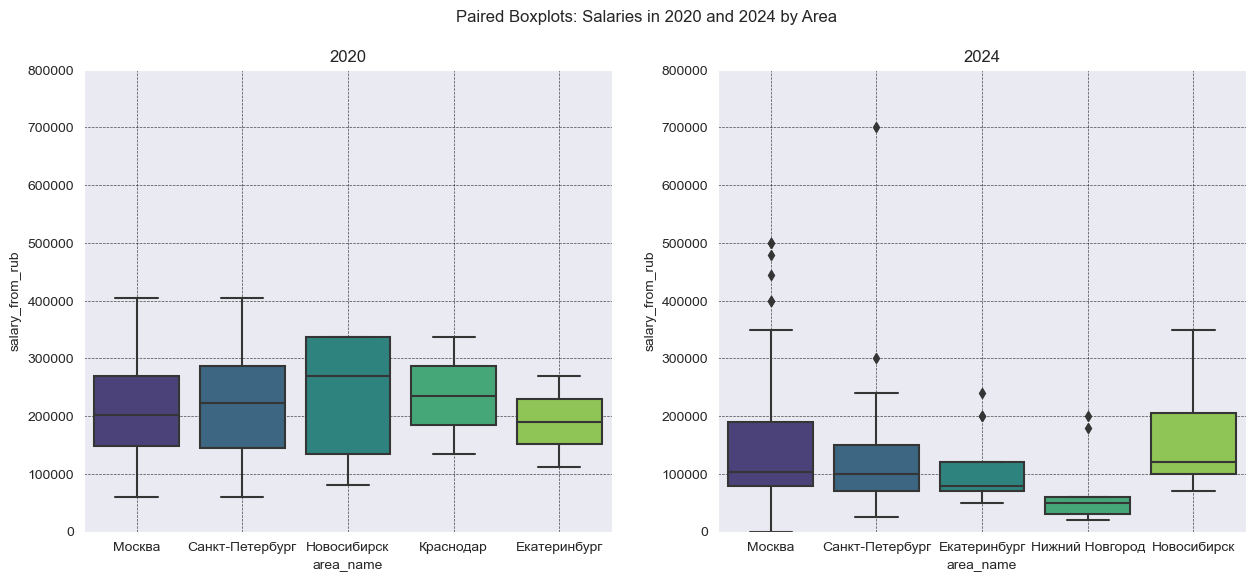

In [102]:
# paired boxplots for salaries for top 5 areas by number of vacancies
df_top5_20 = df20[df20['area_name'].isin(df20['area_name'].value_counts().head(5).index)]
df_top5_24 = df24[df24['area_name'].isin(df24['area_name'].value_counts().head(5).index)]

# sort by number of vacancies
df_top5_20['area_name'] = df_top5_20['area_name'].astype('category').cat.reorder_categories(
    df_top5_20['area_name'].value_counts().index, ordered=True)
df_top5_24['area_name'] = df_top5_24['area_name'].astype('category').cat.reorder_categories(
    df_top5_24['area_name'].value_counts().index, ordered=True)

# 
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0] = sns.boxplot(x='area_name', y='salary_from_rub', data=df_top5_20, ax=ax[0], palette='viridis')
ax[1] = sns.boxplot(x='area_name', y='salary_from_rub', data=df_top5_24, ax=ax[1], palette='viridis')
ax[0].set_ylim(0, 800000)
ax[1].set_ylim(0, 800000)

ax[0].set_title('2020')
ax[1].set_title('2024')

# Add a title for the entire plot
fig.suptitle('Paired Boxplots: Salaries in 2020 and 2024 by Area')

# Add grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)


plt.show()

In [103]:
dataframes = [df20[df20['salary_from_rub'].notna()], df24[df24['salary_from_rub'].notna()]]

# print top 5 area and number of values
for df in dataframes:
    print(df['area_name'].value_counts().head(5))

Москва             52
Санкт-Петербург    24
Новосибирск         5
Самара              3
Пермь               3
Name: area_name, dtype: int64
Москва             157
Санкт-Петербург     46
Екатеринбург        13
Новосибирск         11
Владивосток         10
Name: area_name, dtype: int64


**In this section, "salary" means "salary_from", since we decided to not overload notebook with both from and to salaries.**

**As we can see, for both years the number of vacancies with salary indication has acceptable values, perhaps only for Moscow (Москва) and St. Petersburg (Санкт-Петербург). Even for St.Petersburg, the number of vacancies in 2020 is 24, which is about a border value to provide a reliable statistical test. So, we propose to test the hypothesis that the salaries in Moscow and St. Petersburg are different from the salaries in other areas.**

To be more precise, we will provide Mann-Whitney U test for Москва and Санкт-Петербург, and areas except Москва, areas except Санкт-Петербург for 2020 and 2024 years with:

**1.**
 H0: the salaries in Москва are the same as the salaries in other areas;
 H1: the salaries in Москва are different from the salaries in other areas.

**2.**
 H0: the salaries in Санкт-Петербург are the same as the salaries in other areas;
 H1: the salaries in Санкт-Петербург are different from the salaries in other areas.

In [104]:
labels = ["2020", "2024"]

# Create an empty DataFrame to store the results
results_table = pd.DataFrame(columns=['Year', 'Region', 'p-value'])

# Loop through dataframes and labels
for df, label in zip(dataframes, labels):
    # take only Москва and Санкт-Петербург
    df_moscow = df[df['area_name'] == 'Москва']
    df_spb = df[df['area_name'] == 'Санкт-Петербург']
    df_other_but_moscow = df[df['area_name'] != 'Москва']
    df_other_but_spb = df[df['area_name'] != 'Санкт-Петербург']

    # Perform Mann-Whitney U test
    stat, p_value = mannwhitneyu(df_moscow['salary_from_rub'], df_other_but_moscow['salary_from_rub'])
    results_table = pd.concat(
        [results_table, pd.DataFrame({'Year': [label], 'Region': ['Москва'], 'p-value': [p_value]})],
        ignore_index=True)

    stat, p_value = mannwhitneyu(df_spb['salary_from_rub'], df_other_but_spb['salary_from_rub'])
    results_table = pd.concat(
        [results_table, pd.DataFrame({'Year': [label], 'Region': ['Санкт-Петербург'], 'p-value': [p_value]})],
        ignore_index=True)

# Display the results table
print("Mann-Whitney U Test Results (From)")
print(tabulate(results_table, headers="keys", tablefmt="pretty"))
print("Mann-Whitney U Test Results (To)")
print(tabulate(results_table, headers="keys", tablefmt="pretty"))

Mann-Whitney U Test Results (From)
+---+------+-----------------+-----------------------+
|   | Year |     Region      |        p-value        |
+---+------+-----------------+-----------------------+
| 0 | 2020 |     Москва      |  0.1892769880609525   |
| 1 | 2020 | Санкт-Петербург |  0.24154138293724892  |
| 2 | 2024 |     Москва      | 8.702692136345948e-07 |
| 3 | 2024 | Санкт-Петербург |   0.352962002443592   |
+---+------+-----------------+-----------------------+
Mann-Whitney U Test Results (To)
+---+------+-----------------+-----------------------+
|   | Year |     Region      |        p-value        |
+---+------+-----------------+-----------------------+
| 0 | 2020 |     Москва      |  0.1892769880609525   |
| 1 | 2020 | Санкт-Петербург |  0.24154138293724892  |
| 2 | 2024 |     Москва      | 8.702692136345948e-07 |
| 3 | 2024 | Санкт-Петербург |   0.352962002443592   |
+---+------+-----------------+-----------------------+


**We can see that the p-value is less than 0.05 only for Moscow in 2024 year, so we can reject the null hypothesis and conclude that the salaries in Moscow are different from the salaries in other regions for 2024 year.**

There is one problem appears from this fact: since the number of vacancies from Moscow is much higher than from other regions, the salaries from Moscow have a significant impact on the overall distribution of salaries, so it should be better to compare the salaries in St. Petersburg with the salaries in other regions but Moscow and St. Petersburg, to see better the difference in salaries for Saint Petersburg as "the second capital" of Russia.**

In [105]:
# perform Mann-Whitney U test for Санкт-Петербург, and areas except Москва, areas except Санкт-Петербург for 2024 year
data_24 = df24[df24['salary_from_rub'].notna()]

df_spb_24 = data_24[data_24['area_name'] == 'Санкт-Петербург']
df_spb_24['area_name'] = 'St. Petersburg'
df_other_but_spb_and_moscow = data_24[data_24['area_name'] != 'Санкт-Петербург'][data_24['area_name'] != 'Москва']
df_other_but_spb_and_moscow['area_name'] = 'Other_but_spb_and_moscow'

stat, p_value = mannwhitneyu(df_spb_24['salary_from_rub'], df_other_but_spb_and_moscow['salary_from_rub'])
print(f"2024: p-value for St. Petersburg vs. other regions: {p_value:.4f}")

2024: p-value for St. Petersburg vs. other regions: 0.0027


**As we can see, the p-value is less than 0.05, so we can reject the null hypothesis and conclude that the salaries in St. Petersburg are different from the salaries in other areas, except Moscow and St. Petersburg.
Let us plot this data to show it visually.**

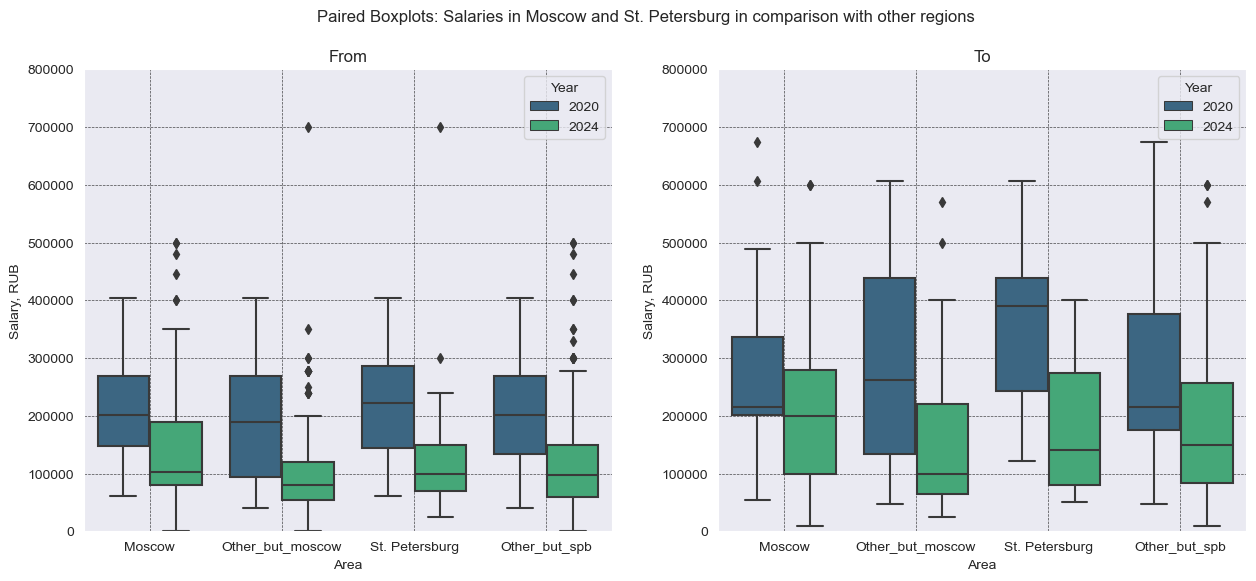

In [106]:
df_moscow_20 = df20[df20['area_name'] == 'Москва']
df_spb_20 = df20[df20['area_name'] == 'Санкт-Петербург']
df_other_but_moscow_20 = df20[df20['area_name'] != 'Москва']
df_other_but_spb_20 = df20[df20['area_name'] != 'Санкт-Петербург']
df_other_but_moscow_20['area_name'] = 'Other_but_moscow'
df_other_but_spb_20['area_name'] = 'Other_but_spb'
df_moscow_20['area_name'] = 'Moscow'
df_spb_20['area_name'] = 'St. Petersburg'

df_moscow_24 = df24[df24['area_name'] == 'Москва']
df_other_but_moscow_24 = df24[df24['area_name'] != 'Москва']
df_other_but_spb_24 = df24[df24['area_name'] != 'Санкт-Петербург']
df_other_but_moscow_24['area_name'] = 'Other_but_moscow'
df_other_but_spb_24['area_name'] = 'Other_but_spb'
df_moscow_24['area_name'] = 'Moscow'

# assign year
df_moscow_20['year'] = 2020
df_spb_20['year'] = 2020
df_other_but_moscow_20['year'] = 2020
df_other_but_spb_20['year'] = 2020
df_moscow_24['year'] = 2024
df_spb_24['year'] = 2024
df_other_but_moscow_24['year'] = 2024
df_other_but_spb_24['year'] = 2024

combined_2020 = pd.concat([df_moscow_20, df_other_but_moscow_20, df_spb_20, df_other_but_spb_20])
combined_2024 = pd.concat([df_moscow_24, df_other_but_moscow_24, df_spb_24, df_other_but_spb_24])

combined = pd.concat([combined_2020, combined_2024])

fig, ax = plt.subplots(1, 2, figsize=(15, 6))


ax[0] = sns.boxplot(x='area_name', y='salary_from_rub', data=combined,
                 palette='viridis', hue='year', ax=ax[0])

ax[1] = sns.boxplot(x='area_name', y='salary_to_rub', data=combined,
                 palette='viridis', hue='year', ax=ax[1])

ax[0].set_title('From')
ax[0].set_ylim(0, 800000)

ax[0].set_ylabel('Salary, RUB')
ax[0].set_xlabel('Area')
ax[0].legend(title='Year')

ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)

ax[1].set_title('To')
ax[1].set_ylim(0, 800000)

ax[1].set_ylabel('Salary, RUB')
ax[1].set_xlabel('Area')
ax[1].legend(title='Year')

ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)

fig.suptitle('Paired Boxplots: Salaries in Moscow and St. Petersburg in comparison with other regions')

plt.show()

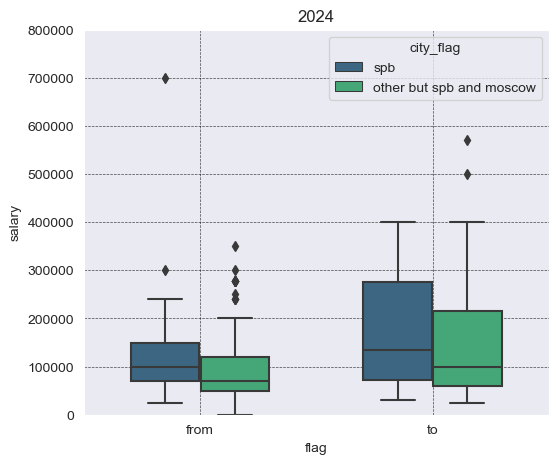

In [107]:
data24_to = df24[df24['salary_to_rub'].notna()]

df_spb_24_to = data24_to[data24_to['area_name'] == 'Санкт-Петербург']
df_other_but_spb_and_moscow_to = data24_to[data24_to['area_name'] != 'Санкт-Петербург'][data24_to['area_name'] != 'Москва']
df_other_but_spb_and_moscow_to['area_name'] = 'Other_but_spb_and_moscow'

# assign to or from flag
df_spb_24_to = df_spb_24_to.assign(flag='to')
df_other_but_spb_and_moscow_to = df_other_but_spb_and_moscow_to.assign(flag='to')
df_spb_24 = df_spb_24.assign(flag='from')
df_other_but_spb_and_moscow = df_other_but_spb_and_moscow.assign(flag='from')


df_spb_24 = df_spb_24.assign(city_flag='spb')
df_other_but_spb_and_moscow = df_other_but_spb_and_moscow.assign(city_flag='other but spb and moscow')
df_other_but_spb_and_moscow_to = df_other_but_spb_and_moscow_to.assign(city_flag='other but spb and moscow')
df_spb_24_to = df_spb_24_to.assign(city_flag='spb')
combined = pd.concat([df_spb_24, df_other_but_spb_and_moscow, df_spb_24_to, df_other_but_spb_and_moscow_to])

# make one column for salary based on flag
combined['salary'] = combined.apply(lambda x: x['salary_from_rub'] if x['flag'] == 'from' else x['salary_to_rub'],
                                     axis=1)


plt.figure(figsize=(6, 5))
sns.boxplot(x='flag', y='salary', hue='city_flag', data=combined,
            palette='viridis', width=0.6)
plt.title('2024')
plt.ylim(0, 800000)
plt.grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
plt.show()

**So we can conclude that in 2020, there is no significant difference in salaries between Moscow, St.Petersburg and other regions, and in 2024, the salaries in Moscow are different from the salaries in other regions, and the salaries in St. Petersburg are different from the salaries in other areas, except Moscow and St. Petersburg.**

## Additional plots: Internship, Junior and other "ranks" in IT difference
Comparing different IT "ranks" (junior, middle, senior, lead) counts in 2020 and 2024.

We found it interesting to compare the number of vacancies for different "ranks" in IT in 2020 and 2024. But there is bias in the data, because the way we get the "ranks" cannot be considered as 100% reliable, so this is provided out of curiosity and complements the main analysis.

In [108]:
words_to_match_int = ['intern', 'стажер', 'стажёр', 'trainee', 'практикант']
words_to_match_jun = ['junior', 'джуниор', 'младший', 'jun']
words_to_match_mid = ['middle', 'средний', 'mid']
words_to_match_sen = ['senior', 'старший', 'sen']
words_to_match_lead = ['lead', 'лидер', 'руководитель', 'ведущий']


def pattern(words_to_match):
    return '|'.join(rf'\b{re.escape(word)}\b' for word in words_to_match)


df20['int'] = df20['name'].str.contains(pattern(words_to_match_int), case=False)
df24['int'] = df24['name'].str.contains(pattern(words_to_match_int), case=False)

df20['jun'] = df20['name'].str.contains(pattern(words_to_match_jun), case=False)
df24['jun'] = df24['name'].str.contains(pattern(words_to_match_jun), case=False)

df20['mid'] = df20['name'].str.contains(pattern(words_to_match_mid), case=False)
df24['mid'] = df24['name'].str.contains(pattern(words_to_match_mid), case=False)

df20['sen'] = df20['name'].str.contains(pattern(words_to_match_sen), case=False)
df24['sen'] = df24['name'].str.contains(pattern(words_to_match_sen), case=False)

df20['lead'] = df20['name'].str.contains(pattern(words_to_match_lead), case=False)
df24['lead'] = df24['name'].str.contains(pattern(words_to_match_lead), case=False)

df20_int = df20['int'].value_counts()
df24_int = df24['int'].value_counts()
df20_jun = df20['jun'].value_counts()
df24_jun = df24['jun'].value_counts()
df20_mid = df20['mid'].value_counts()
df24_mid = df24['mid'].value_counts()
df20_sen = df20['sen'].value_counts()
df24_sen = df24['sen'].value_counts()
df20_lead = df20['lead'].value_counts()
df24_lead = df24['lead'].value_counts()

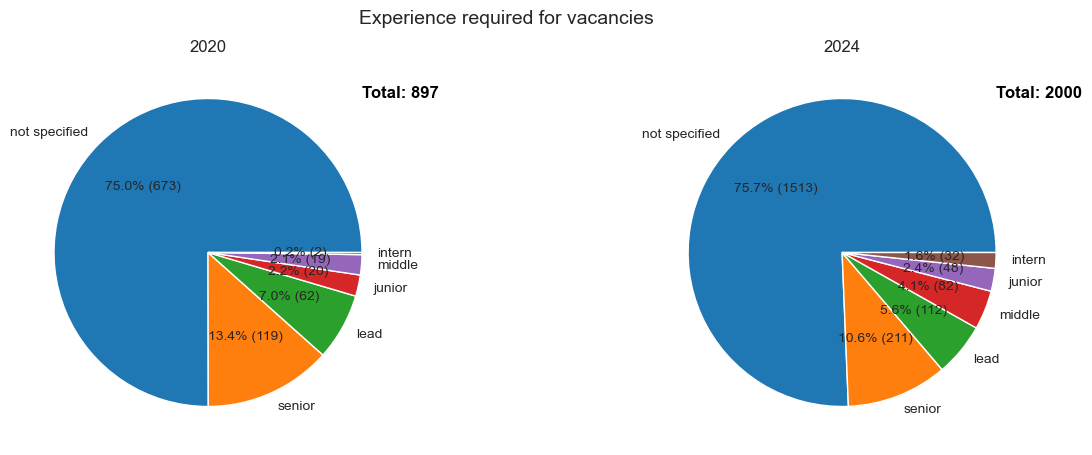

In [109]:
# draw a pie chart with percentages for 2020 and 2024 adding "not specified" row

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# add categories to the dataframes from df_int, df_jun, df_mid, df_sen, df_lead
df20['experience_level'] = 'not specified'
df24['experience_level'] = 'not specified'
df20.loc[df20['int'], 'experience_level'] = 'intern'
df24.loc[df24['int'], 'experience_level'] = 'intern'
df20.loc[df20['jun'], 'experience_level'] = 'junior'
df24.loc[df24['jun'], 'experience_level'] = 'junior'
df20.loc[df20['mid'], 'experience_level'] = 'middle'
df24.loc[df24['mid'], 'experience_level'] = 'middle'
df20.loc[df20['sen'], 'experience_level'] = 'senior'
df24.loc[df24['sen'], 'experience_level'] = 'senior'
df20.loc[df20['lead'], 'experience_level'] = 'lead'
df24.loc[df24['lead'], 'experience_level'] = 'lead'

# reindex the series {not specified: 0, intern: 1, junior: 2, middle: 3, senior: 4, lead: 5}
df20['experience_level'] = df20['experience_level'].astype('category').cat.reorder_categories(
    ['not specified', 'intern', 'junior', 'middle', 'senior', 'lead'], ordered=True)
df24['experience_level'] = df24['experience_level'].astype('category').cat.reorder_categories(
    ['not specified', 'intern', 'junior', 'middle', 'senior', 'lead'], ordered=True)

# create pie charts
ax[0].pie(df20['experience_level'].value_counts(), labels=df20['experience_level'].value_counts().index,
          autopct=lambda pct: func(pct, df20['experience_level'].value_counts()), )

ax[1].pie(df24['experience_level'].value_counts(), labels=df24['experience_level'].value_counts().index,
          autopct=lambda pct: func(pct, df24['experience_level'].value_counts()))

# add a total number of vacancies
ax[0].text(1, 1, f"Total: {total20}", fontsize=12, color='black', weight='bold')
ax[1].text(1, 1, f"Total: {total24}", fontsize=12, color='black', weight='bold')

# put a title
ax[0].set_title('2020')
ax[1].set_title('2024')

# add a title of the whole plot
fig.suptitle('Experience required for vacancies', fontsize=14)
plt.show()

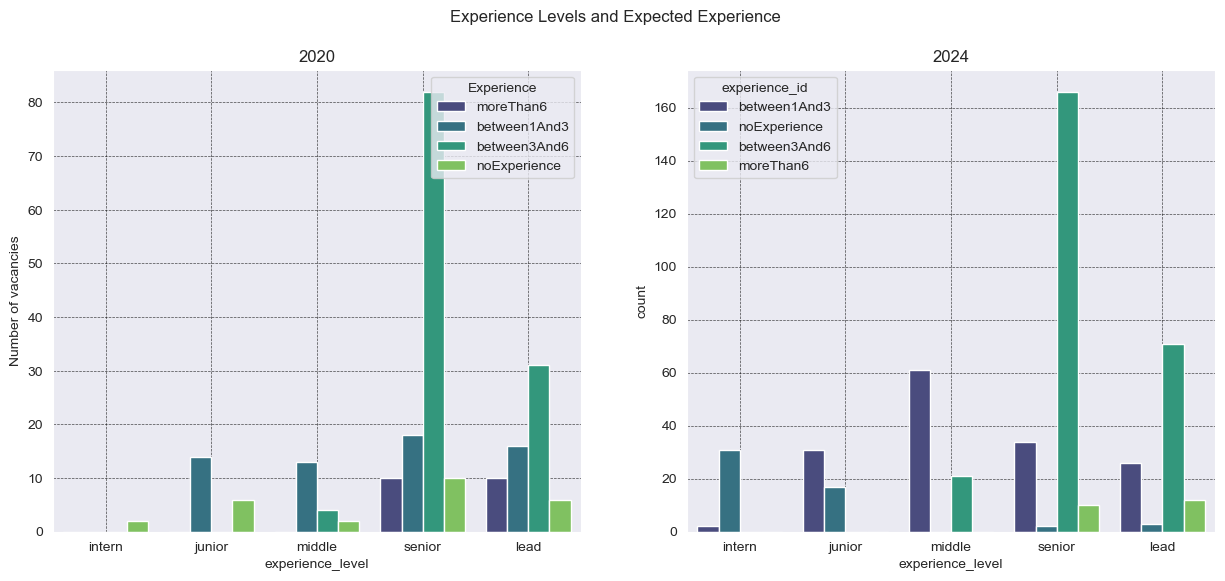

In [110]:
# plot grid of experience levels and expected experience
# subplots for 2020 and 2024, each of them is pairplot of experience levels and expected experience without not specified
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# remove not specified
df20['experience_level'] = df20['experience_level'].cat.remove_categories('not specified')
df24['experience_level'] = df24['experience_level'].cat.remove_categories('not specified')

# Make 2 pairplots appear on the same scale
ax[0] = sns.countplot(x='experience_level', hue='experience_id', data=df20, ax=ax[0], palette='viridis', order=['intern', 'junior', 'middle', 'senior', 'lead'])
ax[1] = sns.countplot(x='experience_level', hue='experience_id', data=df24, ax=ax[1], palette='viridis', order=['intern', 'junior', 'middle', 'senior', 'lead'])
ax[0].set_title('2020')
ax[1].set_title('2024')

# Add a title for the entire plot
fig.suptitle('Experience Levels and Expected Experience')

# Add a legend
ax[0].legend(title='Experience', loc='upper right')

# Add grid
ax[0].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[1].grid(True, linestyle='--', linewidth=0.5, color='black', alpha=0.7)
ax[0].set_ylabel('Number of vacancies')

plt.show()

## For further research:
1. Provide one-tailed Mann-Whitney U tests for different areas in 2020 and 2024 to see if the salaries in 2024 are less than the salaries in 2020 for different areas.
2. Provide Mann-Whitney U tests not only for lower bounds of salaries but also for upper bounds of salaries.
3. Define "ranks" in IT more precisely and analyze the number of vacancies for different "ranks" in IT in 2020 and 2024.
4. Check if salary changes are different for different "ranks" in IT.
5. Provide the analysis of "is_insider_interview", "has_test" to see if the number of vacancies with these parameters has changed from 2020 to 2024.
6. Provide the analysis of remote work availability to see if the number of vacancies with remote work has changed from 2020 to 2024.
7. Check if the salaries for remote work vacancies are different from the salaries for non-remote work vacancies.